In [34]:
# !python -m pip install prophet

In [33]:
# !pip install --upgrade plotly

In [32]:
# !pip install pandas

In [31]:
# !pip install scikit-learn

In [30]:
# !pip install seaborn

In [35]:
import pickle

c:\Users\MANAV JASANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
00:27:17 - cmdstanpy - INFO - Chain [1] start processing


              AsOnDt  Respiratory
0   2018-01-31 00:00         5831
1   2018-02-28 00:00         5644
2   2018-03-31 00:00         5404
3   2018-04-30 00:00         4725
4   2018-05-31 00:00         4712
..               ...          ...
60  2022-08-31 00:00         6678
61  2022-09-30 00:00         6214
62  2022-10-31 00:00         6081
63  2022-11-30 00:00         6261
64  2022-12-31 00:00         6567

[65 rows x 2 columns]


00:27:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\MANAV JASANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\MANAV JASANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\MANAV JASANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to

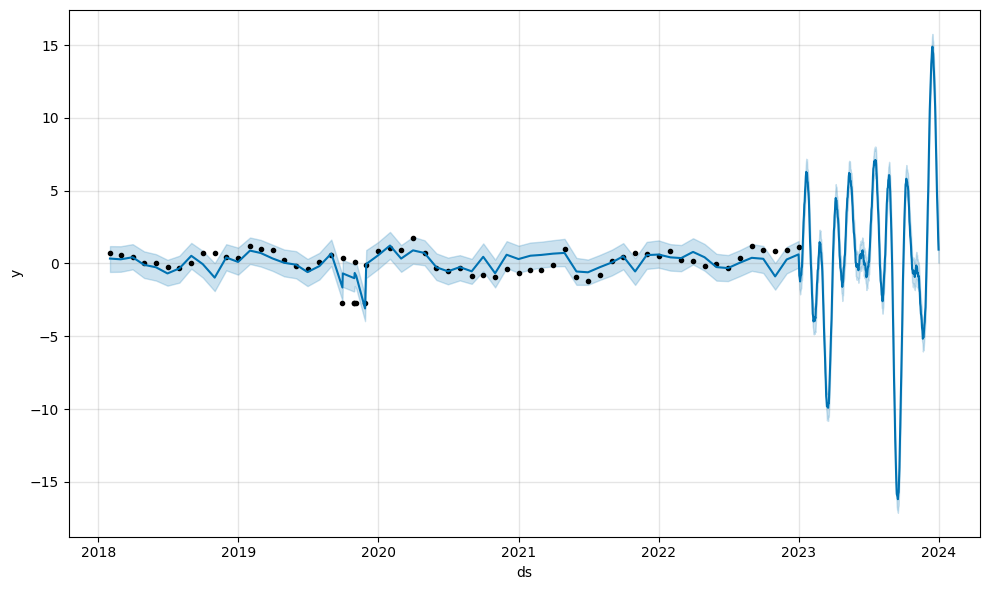

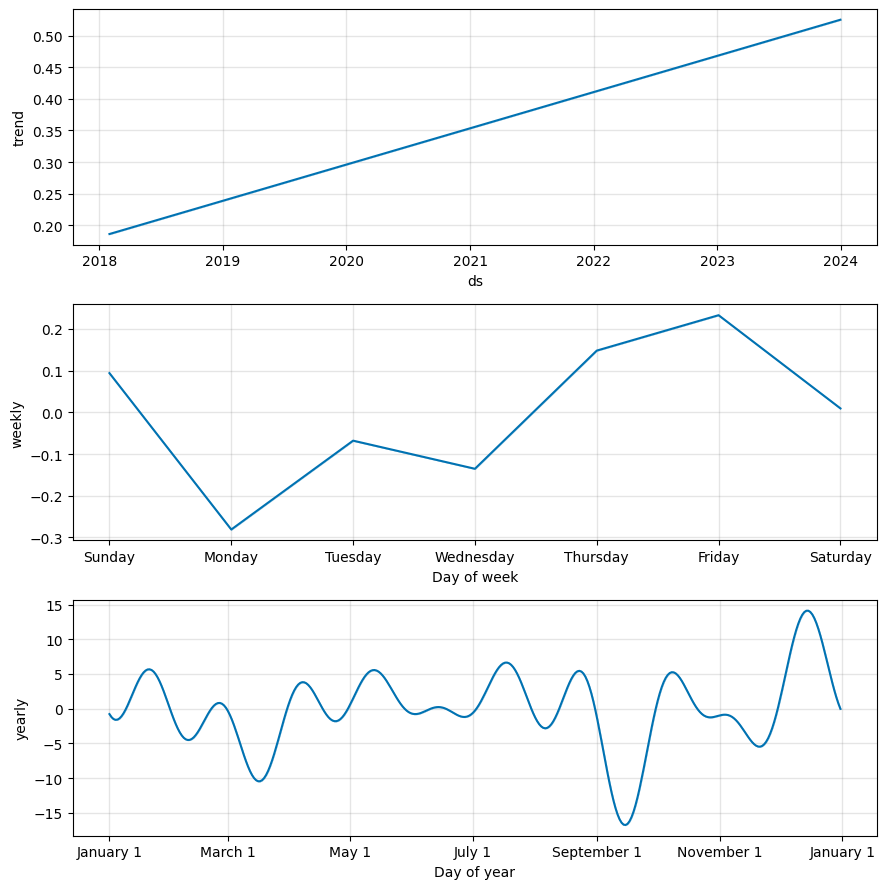

In [2]:
#To be used for prophet
import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import StandardScaler


#Main code
df= pd.read_csv('data.csv')
df1= pd.read_csv('data.csv')

# Convert the 'date' column to datetime format
df['AsOnDt'] = pd.to_datetime(df['AsOnDt'])

# Format the 'date' column in the desired format 'yyyy-mm-dd tt:tt'
df['AsOnDt'] = df['AsOnDt'].dt.strftime('%Y-%m-%d %H:%M')
attri = "No_Of_Victims_Shifted"
typeofprocess = "General"

if typeofprocess == "General":
  attri = "Respiratory"
  df=df.groupby('AsOnDt').agg({attri: 'sum'}).reset_index()
else:
  dist = "Surat"
  attri = "Respiratory"
  df = df[df['District_Eng'].str.contains(dist, case=False)]
  df = df.groupby(['District_Eng', 'AsOnDt']).agg({attri: 'sum'}).reset_index()


print(df)

# Initialize StandardScaler
scaler = StandardScaler()

# Specify columns to normalize
columns_to_normalize = [attri]

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

dfvar = df[[attri,'AsOnDt']]
dfvar = dfvar.rename(columns={'AsOnDt': 'ds', attri: 'y'})
#dfResp['y'] = dfResp['y'].apply(lambda x: min(x, 25))


m = Prophet()
m.fit(dfvar)
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1=m.plot(forecast)

fig2 = m.plot_components(forecast)

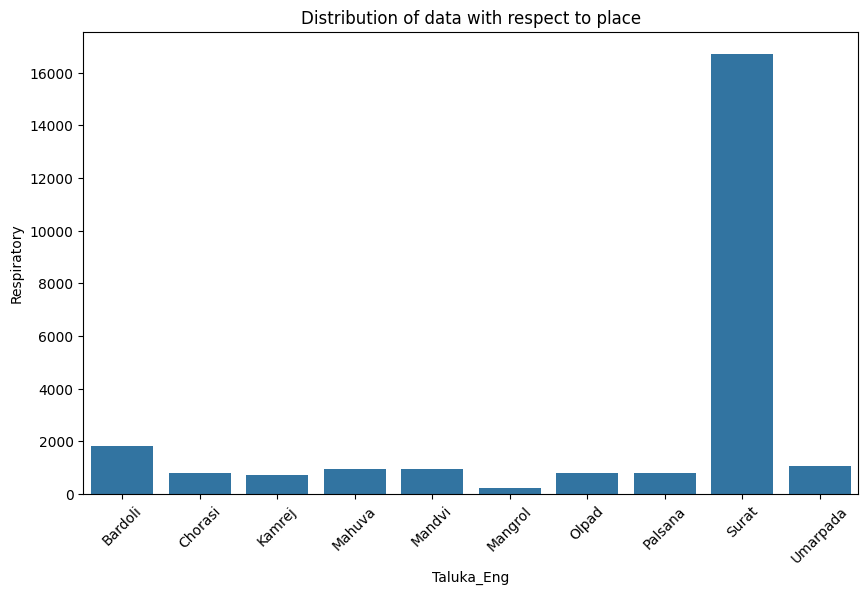

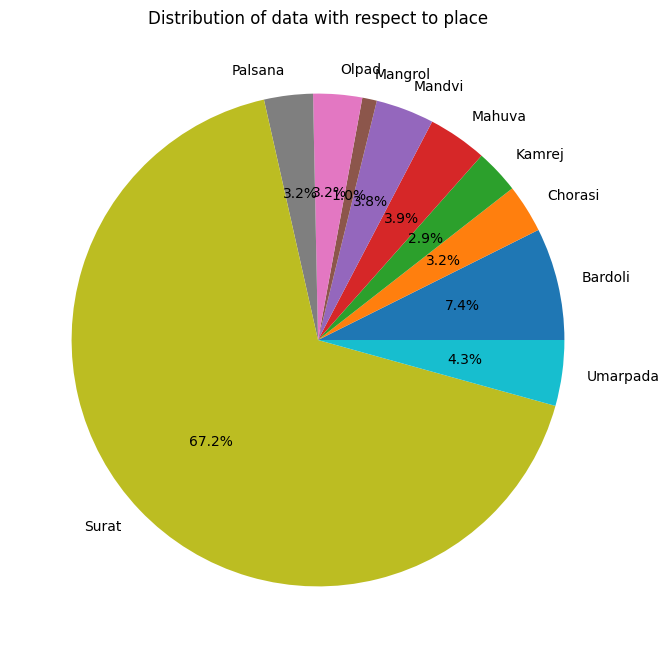

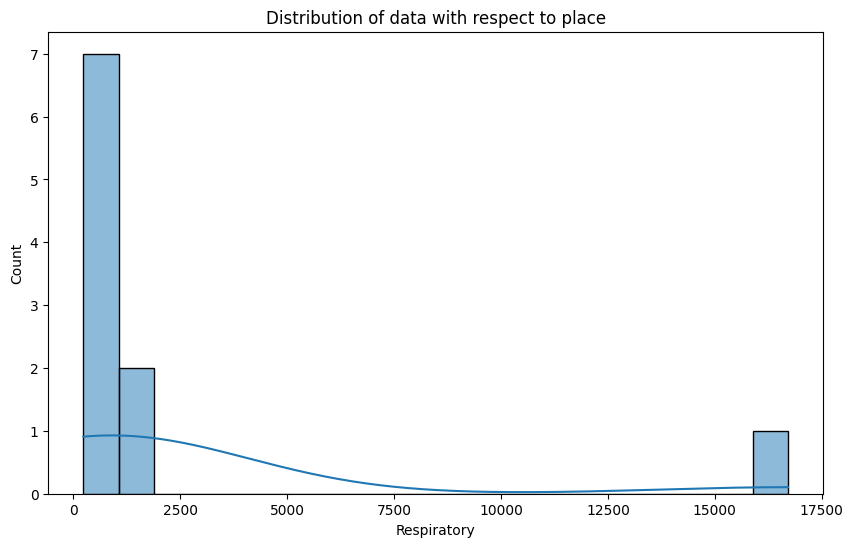

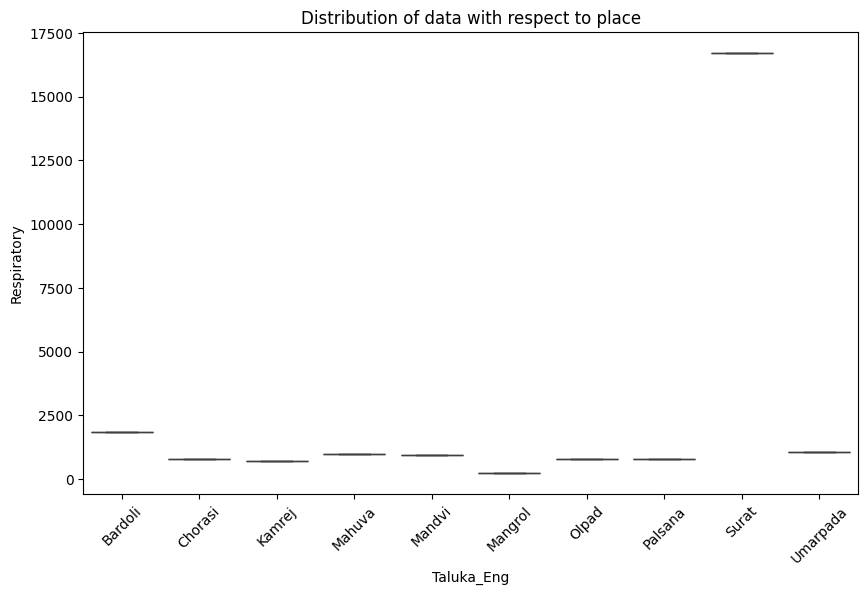

In [1]:
#For diagram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def filter_by_d(df, selected,attribute):
    filtered_df = df[df['District_Eng'] == selected]
    filtered_df = filtered_df[['Taluka_Eng', attribute]]
    filtered_df = filtered_df.groupby('Taluka_Eng').agg({attri: 'sum'}).reset_index()
    return(filtered_df)


df= pd.read_csv('data.csv')
df['AsOnDt'] = pd.to_datetime(df['AsOnDt'])
df['AsOnDt'] = df['AsOnDt'].dt.strftime('%Y-%m-%d')
attri = "No_Of_Victims_Shifted"
typeofprocess = "Genera"


if typeofprocess == "General":
  attri = "Respiratory"
  df=df.groupby('District_Eng').agg({attri: 'sum'}).reset_index()
  place='District_Eng'

else:
  dist = "Surat"
  attri = "Respiratory"
  df = filter_by_d(df, dist,attri)
  place = 'Taluka_Eng'


# 1. Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=place, y=attri, data=df)
plt.title('Distribution of data with respect to place')
plt.xticks(rotation=45)
plt.show()


# 2. Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df.groupby(place)[attri].sum(), labels=df[place].unique(), autopct='%1.1f%%')
plt.title('Distribution of data with respect to place')
plt.show()


# 3. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[attri], bins=20, kde=True)
plt.title('Distribution of data with respect to place')
plt.xlabel(attri)
plt.show()


#4.Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=place, y=attri, data=df)
plt.title('Distribution of data with respect to place')
plt.xticks(rotation=45)
plt.show()



In [11]:
!pip install gluonts
!pip install --upgrade mxnet==1.6.0
!pip install "gluonts[torch]"

  Using cached gluonts-0.14.4-py3-none-any.whl.metadata (9.5 kB)
  Using cached pydantic-2.6.1-py3-none-any.whl.metadata (83 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
Using cached gluonts-0.14.4-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
    --------------------------------------- 0.2/10.5 MB 2.3 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.5 MB 2.1 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.5 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.5 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.5 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.5 MB 860.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.5 MB 758.5 kB/s eta 0:00:14
    --------------------------------------- 0.3/10.5 MB 714.4 k

  You can safely remove it manually.
  You can safely remove it manually.



   --------------- ------------------------ 4.0/10.5 MB 270.7 kB/s eta 0:00:25
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.4 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.4 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 270.7 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.0/10.5 MB 271.2 kB/s eta 0:00:24
   --------------- ------------------------ 4.1/10.

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [260 lines of output]
      Running from numpy source directory.
      <string>:394: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      C:\Users\MANAV JASANI\AppData\Local\Temp\pip-install-pwt2vne_\numpy_12df672e157d4c438dd52a3f099d0d15\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Users\\MANAV JASANI\\AppData\\Local\\Programs\\Python\\Python312\\lib', 'C:\\', 'C:\\Users\\MANAV JASANI\\AppData\\Local\\Programs\\Python\\Python312\\libs']
        NOT AVAILABLE
      
      blis_info:
   

  Using cached lightning-2.1.4-py3-none-any.whl.metadata (57 kB)
  Using cached pytorch_lightning-2.1.4-py3-none-any.whl.metadata (21 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached lightning_utilities-0.10.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached torchmetrics-1.3.1-py3-none-any.whl.metadata (19 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached aiohttp-3.9.3-cp312-cp312-win_amd64.whl.metadata (7.6 kB)
  Using cached setuptools-69.1.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
Using cached lightning-2.1.4-py3-none-any.whl (2.0 MB)
Using cached pytorch_lightning-2.1.4-py3-none-any.whl (778 kB)
   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
 


   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ ------- 160.3/198.5 MB 181.0 kB/s eta 0:03:31
   ------------------------------ -----

In [5]:
!pip install "gluonts[mxnet]"

In [6]:
!pip install numpy==1.23.1

In [7]:
!pip install mxnet-mkl==1.6.0 numpy==1.23.1

In [8]:
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

In [39]:
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

with open('data.pkl', 'wb') as f:
    pickle.dump(df1, f)

In [10]:
#The DeepAR to be used
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator
from sklearn.preprocessing import StandardScaler

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

#Main code
df= pd.read_csv('data.csv')
# Convert the 'date' column to datetime format
df['AsOnDt'] = pd.to_datetime(df['AsOnDt'])
# Format the 'date' column in the desired format 'yyyy-mm-dd'
df['AsOnDt'] = df['AsOnDt'].dt.strftime('%Y-%m')
attri = "Pregnancy"
typeofprocess = "General"
if typeofprocess == "General":
  attri = "Pregnancy"
  df=df.groupby('AsOnDt').agg({attri: 'sum'}).reset_index()
else:
  dist = "Surat"
  attri = "Pregnancy"
  df = df[df['District_Eng'].str.contains(dist, case=False)]
  df = df.groupby(['District_Eng', 'AsOnDt']).agg({attri: 'sum'}).reset_index()


#print(df)

# Initialize StandardScaler
#scaler = StandardScaler()
# Specify columns to normalize
#columns_to_normalize = [attri]
# Fit and transform the selected columns
#df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

dfvar = df[[attri,'AsOnDt']]
dfvar = dfvar.rename(columns={'AsOnDt': 'ds', attri: 'y'})
dfvar['ds'] = pd.to_datetime(dfvar['ds'])
# Set 'ds' as index
dfvar.set_index('ds', inplace=True)

#print(dfvar)

dataset = PandasDataset(dfvar, freq="1M", target="y")
tot = 30 #len(dfvar)
part = 10 #tot // 3  # Using integer division to ensure the result is a whole number

#print(tot,part)
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-tot)
test_data = test_gen.generate_instances(prediction_length=part, windows=3)

# Train the model and make predictions
model = DeepAREstimator(prediction_length=20, freq="1M", trainer_kwargs={"max_epochs": 15}).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(dfvar["2020":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

ModuleNotFoundError: No module named 'gluonts'